# Clustering & PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/student-data.csv")


In [2]:
features =['studytime', 'absences', 'G1', 'G2']
X = df[features].values

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K-Means Clustering

<function matplotlib.pyplot.show(close=None, block=None)>

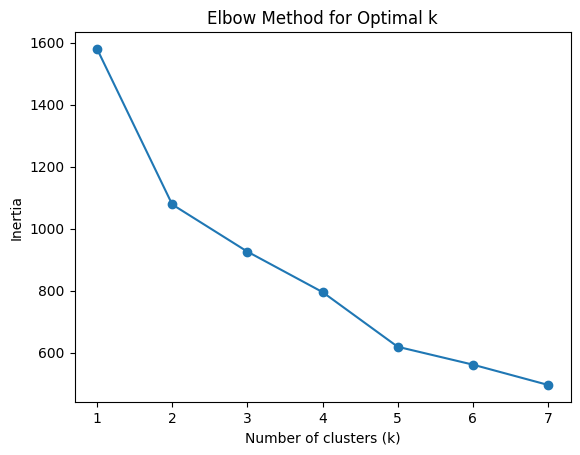

In [4]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 8):
    km = KMeans(n_clusters=k, random_state = 42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(range(1, 8), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show

In [ ]:
# Fit KMeans with optimal k
kmeans = KMeans(n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

df["cluster"] = clusters
df["cluster"].value_counts()

cluster
2    159
1    119
0    117
Name: count, dtype: int64

In [6]:
# Interpret Clusters

df.groupby("cluster")[features].mean()

,studytime,absences,G1,G2
cluster,,,,
0,2.598291,2.692308,9.299145,9.350427
1,1.495798,10.319328,8.184874,7.495798
2,2.025157,4.477987,14.132075,14.125786


# PCA

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

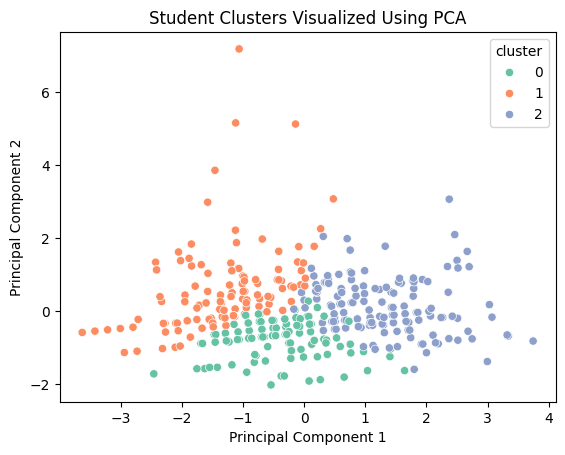

In [9]:
# Visualize clusters

plt.figure()
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["cluster"], palette="Set2")
plt.title("Student Clusters Visualized Using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()